In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
df = pd.read_csv('updated_hf.csv')

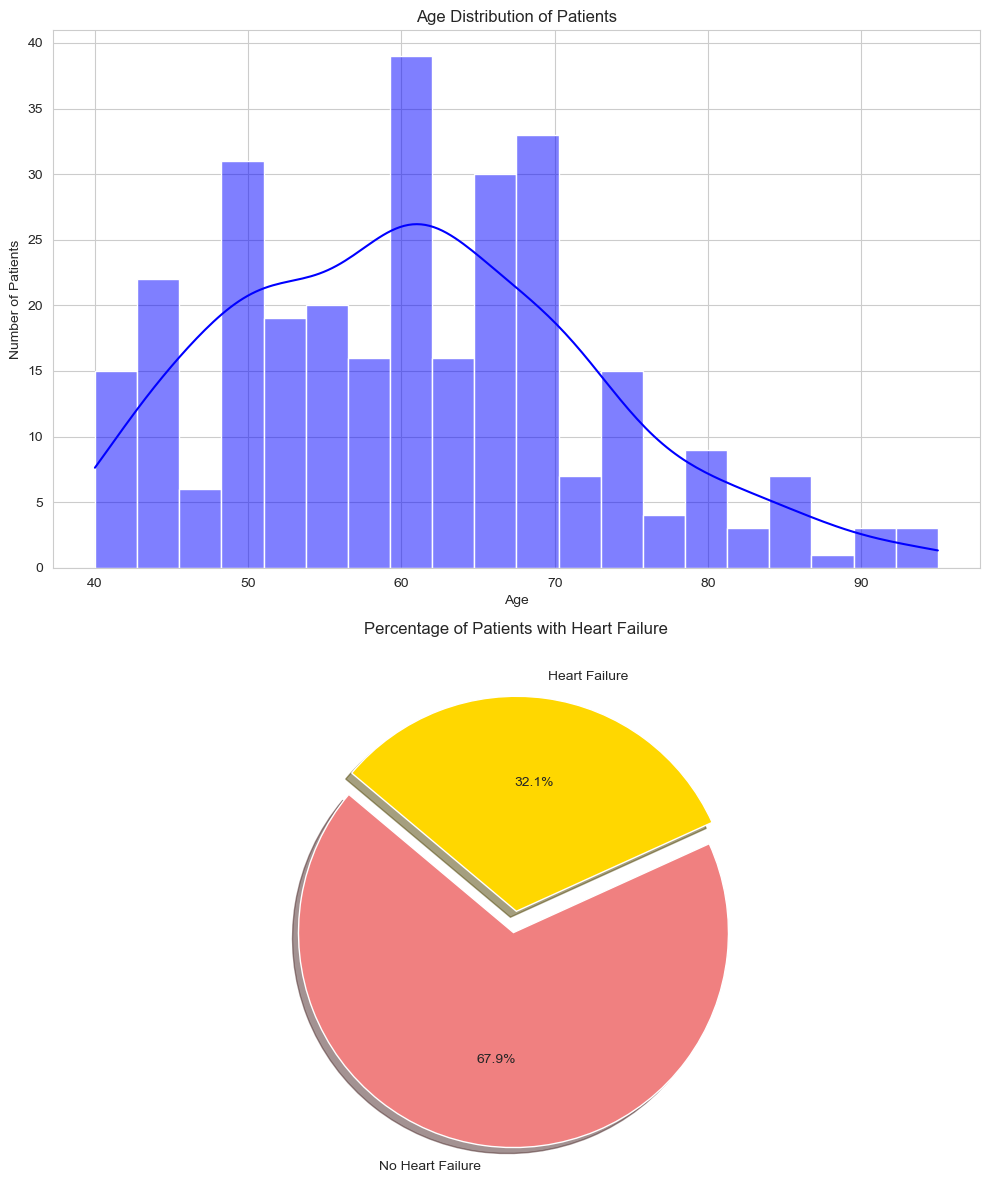

In [3]:

# Set style for visualizations
sns.set_style("whitegrid")

# Initialize the figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot Age Distribution
sns.histplot(df['age'], bins=20, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Age Distribution of Patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Patients')

# Plot Percentage of Patients with Heart Failure
labels = ['No Heart Failure', 'Heart Failure']
sizes = df['DEATH_EVENT'].value_counts().values
colors = ['lightcoral', 'gold']
explode = (0.1, 0)  # explode 1st slice for emphasis
ax[1].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax[1].set_title('Percentage of Patients with Heart Failure')

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
# Bar Chart: Heart Failure Events by Gender
gender_counts = df.groupby('sex')['DEATH_EVENT'].value_counts().unstack().reset_index()
gender_counts.columns = ['Gender', 'No Heart Failure', 'Heart Failure']
gender_counts['Gender'] = gender_counts['Gender'].replace({0: 'Female', 1: 'Male'})

bar_fig = px.bar(
    gender_counts, 
    x='Gender', 
    y=['No Heart Failure', 'Heart Failure'], 
    title="Heart Failure Events by Gender"
)

# Box Plot: Age Distribution by Heart Failure Event
box_fig = px.box(
    df, 
    x='DEATH_EVENT', 
    y='age', 
    points="all",
    labels={"DEATH_EVENT": "Heart Failure Event", "age": "Age"},
    title="Age Distribution by Heart Failure Event"
)
box_fig.update_layout(xaxis_tickvals=[0, 1], xaxis_ticktext=['No Heart Failure', 'Heart Failure'])

bar_fig.show()
box_fig.show()


In [5]:
# Parallel Coordinates Plot
parallel_fig = px.parallel_coordinates(df, 
                                       color='DEATH_EVENT',
                                       labels={"DEATH_EVENT": "Heart Failure Event"},
                                       title="Parallel Coordinates Plot: Multivariate Analysis")
parallel_fig.show()


In [6]:
contour_fig = px.density_contour(
    df, 
    x='ejection_fraction', 
    y='serum_creatinine', 
    color='DEATH_EVENT',
    marginal_x="histogram", 
    marginal_y="histogram",
    title="Density Contour: Ejection Fraction vs Serum Creatinine by Heart Failure Event"
)
contour_fig.show()

In [7]:
df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,criticality_rank,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,2,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,1,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,1,0


In [8]:
new_colu = df.columns.to_list()
new_colu

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'criticality_rank',
 'DEATH_EVENT']

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df[new_colu[:-1]], df[new_colu[-1]], test_size=.20, random_state=2)

In [11]:
X_train 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,criticality_rank
53,70,1,69,1,50,1,351000,1.0,134,0,0,44,1
172,70,1,171,0,60,1,176000,1.1,145,1,1,146,1
23,53,0,63,1,60,0,368000,0.8,135,1,0,22,0
98,60,1,156,1,25,1,318000,1.2,137,0,0,85,1
244,54,0,582,1,38,0,264000,1.8,134,1,0,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,60,1,47,0,20,0,204000,0.7,139,1,1,73,1
22,68,1,220,0,35,1,289000,0.9,140,1,1,20,2
72,85,0,5882,0,35,0,243000,1.0,132,1,1,72,3
15,82,1,379,0,50,0,47000,1.3,136,1,0,13,1


In [12]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,criticality_rank
179,55,0,835,0,40,0,279000,0.70,140,1,1,147,0
221,65,0,118,0,50,0,194000,1.10,145,1,1,200,0
226,58,1,57,0,25,0,189000,1.30,132,1,1,205,1
7,60,1,315,1,60,0,454000,1.10,131,1,1,10,0
173,50,1,115,0,20,0,189000,0.80,139,1,0,146,1
30,94,0,582,1,38,1,263358,1.83,134,1,0,27,1
183,75,0,99,0,38,1,224000,2.50,134,1,0,162,1
181,59,1,176,1,25,0,221000,1.00,136,1,1,150,1
271,51,0,582,1,40,0,221000,0.90,134,0,0,244,0
141,46,1,291,0,35,0,348000,0.90,140,0,0,109,1


In [13]:
y_train

53     1
172    0
23     0
98     0
244    0
      ..
75     1
22     1
72     1
15     1
168    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [14]:
y_test

179    0
221    0
226    0
7      1
173    0
30     1
183    1
181    1
271    0
141    0
13     1
272    0
35     1
270    0
77     0
267    0
206    0
94     0
91     0
214    0
3      1
104    0
29     1
170    0
134    0
41     1
251    0
288    0
133    0
160    0
152    0
66     1
243    0
237    0
89     0
273    0
157    0
103    0
126    1
222    0
11     1
224    0
164    1
127    0
174    0
74     1
188    0
239    0
283    0
156    0
131    0
99     0
10     1
84     1
142    0
65     1
118    0
282    0
109    0
205    0
Name: DEATH_EVENT, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)
pred = ran_for.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
accuracy 

0.95

In [18]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



In [21]:
from sklearn.metrics import confusion_matrix

# Get predicted values for the test set
y_pred = ran_for.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(cm)



[[43  0]
 [ 3 14]]


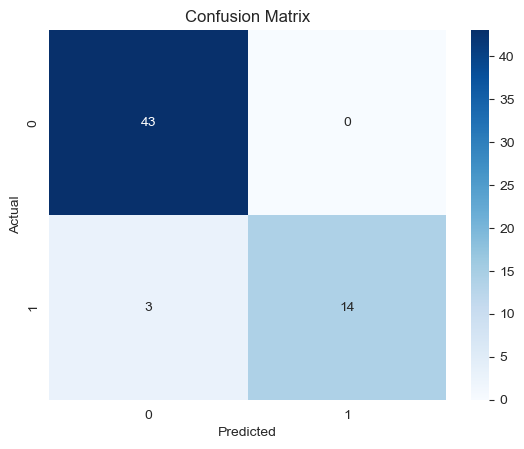

In [23]:
import seaborn as sns

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



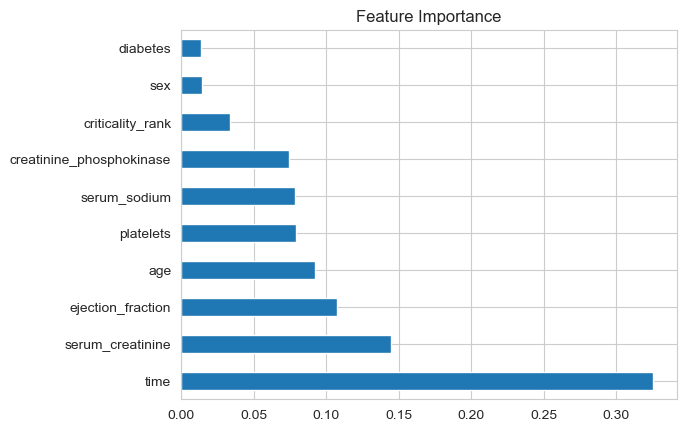

In [24]:
importances = ran_for.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
